In [3]:
import numpy as np
import pandas as pd
import sklearn
import umap
import matplotlib.pyplot as plt
import pickle

In [41]:
features = pd.read_pickle("../train_features.pkl")
labels = pd.read_csv("../train_labels.csv",index_col="challenge_oid")
features.index.name = "challenge_oid"
features_original = features.join(labels)
features_original = features_original[~pd.isna(features_original["classALeRCE"])]
features_test = pd.read_pickle("../test_features.pkl")

features_wise = pd.read_csv("../WISE_data_4_hackathon_with_IDs.csv")
#join wise with train
#features = features_original.join(features_wise)#, on="challenge_oid")
#features_test = features_test.join(features_wise)#, on="challenge_oid")
#join wise with test

In [42]:
import sklearn.decomposition
import sklearn.impute
import sklearn.preprocessing
import sklearn.pipeline

preprocess_pipeline = sklearn.pipeline.make_pipeline(
    sklearn.impute.SimpleImputer(strategy="median"),
    sklearn.preprocessing.MinMaxScaler(),
    umap.UMAP(),
)

In [43]:
data = features.join(labels)
sn = data[data.classALeRCE == "SNII"]
sn_features = sn.drop("classALeRCE", axis=1)
label_encoder = sklearn.preprocessing.LabelEncoder()
num_labels = label_encoder.fit_transform(data["classALeRCE"])
preprocess_pipeline.fit(data.drop("classALeRCE", axis=1), num_labels)

C:\Users\Alexis\Anaconda3\envs\ds\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\..\Anaconda3\envs\ds\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('umap',
                 UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
                      learning_rate=1.0, local_connectivity=1.0,
                      metric='euclidean', metric_kwds=None, min_dist=0.1,
                      n_components=2, n_epochs=None, n_neighbors=15,
                      negative_sample_rate=5, random_state=None,
                      repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
                      target_metric='categorical', target_metric_kwds=None,
                      target_n_neighbors=-1, target_weight=0.5,
                      transform_queue_size=4.0, transform_seed=42,
    

In [44]:
pca_sn_features = preprocess_pipeline.transform(sn_features)

C:\Users\Alexis\Anaconda3\envs\ds\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\..\Anaconda3\envs\ds\lib\site-packages\umap\nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  state.func_ir.loc))
C:\Users\Alexis\Anaconda3\envs\ds\lib\site-packages\numba\typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\..\Anaconda3\envs\ds\lib\site-packages\

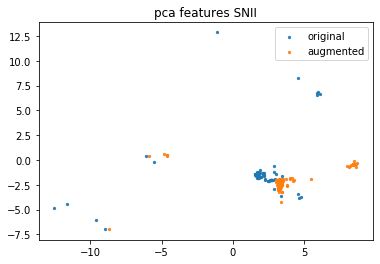

In [45]:
plt.scatter(pca_sn_features[:,0], pca_sn_features[:,1], alpha=0.6, s=5, label="original")
augmented_features = pd.read_csv("../augmented_snII_features.csv").drop(["Unnamed: 0"], axis=1)
pca_augmented_features = preprocess_pipeline.transform(augmented_features)
plt.scatter(pca_augmented_features[:,0], pca_augmented_features[:,1], alpha=0.6, s=5, label="augmented")
plt.title("pca features SNII")
plt.legend()

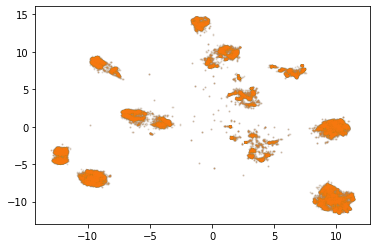

In [46]:
transformed_all = preprocess_pipeline.transform(features)
transformed_test = preprocess_pipeline.transform(features_test)

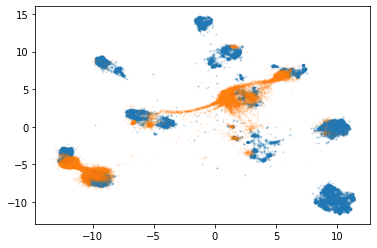

In [47]:

plt.scatter(transformed_all[:,0], transformed_all[:,1], alpha=0.1, s=1, label="training")
plt.scatter(transformed_test[:,0], transformed_test[:,1], alpha=0.1, s=1, label="test")
